# Building Conway's Game of Life in Python

## Project Description

In this project, you will implement a simulation of Conway's Game of Life, invented by mathematician John Horton Conway. This is an excellent opportunity to apply your Python programming skills while exploring fascinating concepts in cellular automata, emergence, and complexity theory.

### Overview

Conway’s Game of Life is a zero-player game that requires only an initial state and no further input. The game takes place on a grid of square cells, each of which can be in one of two states: live or dead. Each cell interacts with its eight neighbors (horizontally, vertically, or diagonally adjacent cells). Starting from the initial state, the game evolves according to the following rules:

1. **Survival**: Any live cell with two or three live neighbors survives. Otherwise, it dies due to loneliness (with no or only one neighbor) or overpopulation (with four or more neighbors).
2. **Birth**: Any dead cell with exactly three live neighbors becomes a live cell. A dead cell with any other number of neighbors remains dead.

In this project, the infinite grid is restricted to a finite grid with predefined dimensions.

### Significance

Despite its simplicity, the Game of Life can create complex behaviors, which have implications across various fields—from physics and mathematics to philosophy and art.

### Project Requirements

- **Programming Language**: Python 3 or newer
- **IDE**: Any IDE of your choice (Jupyter Notebook, Spyder, PyCharm, Visual Studio, etc.)
- **Note**: The file attached to this project is a Jupyter Notebook.

Embark on this journey to simulate the Game of Life and witness the emergence of complexity from simple rules!

In [1]:

class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
        self.x_dim = x_dim
        self.y_dim = y_dim
    
    def get_grid(self):
        # Implement a getter method for your grid.
        return self.life_grid
    
    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        for row in self.life_grid:
            print(' '.join(['█' if cell else ' ' for cell in row]))
        print()
    
    def populate_grid(self, coord):
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for x, y in coord:
            if 0 <= x < self.x_dim and 0 <= y < self.y_dim:
                self.life_grid[x][y] = 1
    
    def make_step(self):
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        new_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                live_neighbors = self.count_live_neighbors(x, y)
                if self.life_grid[x][y] == 1:
                    if live_neighbors in [2, 3]:
                        new_grid[x][y] = 1
                else:
                    if live_neighbors == 3:
                        new_grid[x][y] = 1
        self.life_grid = new_grid
    
    def count_live_neighbors(self, x, y):
        # Helper method to count live neighbors of a cell at (x, y).
        live_neighbors = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                if not (i == 0 and j == 0):
                    new_x, new_y = x + i, y + j
                    if 0 <= new_x < self.x_dim and 0 <= new_y < self.y_dim:
                        live_neighbors += self.life_grid[new_x][new_y]
        return live_neighbors
    
    def make_n_steps(self, n):
        # Implement a method that applies the make_step method n times.
        for _ in range(n):
            self.make_step()
    
    def draw_grid(self):
        # Draw the current state of the grid.
        try:
            import matplotlib.pyplot as plt
            import numpy as np
            plt.imshow(np.array(self.life_grid), cmap='binary')
            plt.show()
        except ImportError:
            print("matplotlib is not installed, please install it to use this feature.")


Initial grid:
         
         
         
         
         

Populated grid:
    █    
█   █    
  █ █    
         
         

Grid after one step:
  █      
    █ █  
  █ █    
         
         

Grid after two steps:
    █    
      █  
  █ █ █  
         
         



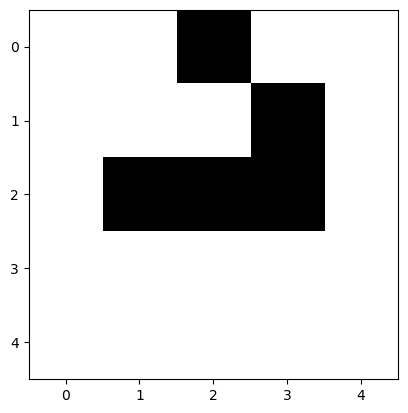

In [2]:
# Test the GameOfLife class
game = GameOfLife(5, 5)

# Initial grid (should be all zeros)
print("Initial grid:")
game.print_grid()

# Populate the grid with a simple pattern (glider)
initial_live_cells = [(1, 0), (2, 1), (0, 2), (1, 2), (2, 2)]
game.populate_grid(initial_live_cells)

print("Populated grid:")
game.print_grid()

# Make one step and print the grid
game.make_step()
print("Grid after one step:")
game.print_grid()

# Make another step and print the grid
game.make_step()
print("Grid after two steps:")
game.print_grid()

# Draw the grid using matplotlib
game.draw_grid()
